# Importing the libraries

In [ ]:
#importing the necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from tqdm.auto import tqdm 
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import re 
from collections import Counter
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import precision_score, recall_score , f1_score, accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
lemma = WordNetLemmatizer()
lb = LabelEncoder()

In [78]:
#Loading the train data 
df = pd.read_csv('twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [79]:
np.unique(df['Borderlands'])

array(['Amazon', 'ApexLegends', 'AssassinsCreed', 'Battlefield',
       'Borderlands', 'CS-GO', 'CallOfDuty', 'CallOfDutyBlackopsColdWar',
       'Cyberpunk2077', 'Dota2', 'FIFA', 'Facebook', 'Fortnite', 'Google',
       'GrandTheftAuto(GTA)', 'Hearthstone', 'HomeDepot',
       'LeagueOfLegends', 'MaddenNFL', 'Microsoft', 'NBA2K', 'Nvidia',
       'Overwatch', 'PlayStation5(PS5)',
       'PlayerUnknownsBattlegrounds(PUBG)', 'RedDeadRedemption(RDR)',
       'TomClancysGhostRecon', 'TomClancysRainbowSix', 'Verizon',
       'WorldOfCraft', 'Xbox(Xseries)', 'johnson&johnson'], dtype=object)

In [80]:
np.unique(df['Positive'])

array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object)

In [81]:
df = df.drop('2401',axis=1)

In [82]:
df= df.rename(columns={"Borderlands":"Feature2","im getting on borderlands and i will murder you all ,":"Feature1","Positive": "labels"})

In [83]:
df.head()

,Feature2,labels,Feature1
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [84]:
df["tweets"]= df["Feature1"].astype(str) +" "+ df["Feature2"].astype(str)
df= df.drop(["Feature1","Feature2"],axis=1)

In [85]:
df_labels = {key : value for value , key in enumerate(np.unique(df['labels']))}
df_labels

{'Irrelevant': 0, 'Negative': 1, 'Neutral': 2, 'Positive': 3}

In [86]:
def getlabel(n) : 
    for x , y in df_labels.items() : 
        if y==n : 
            return x

# Explanatory Data Analysis

object
['Positive' 'Neutral' 'Negative' 'Irrelevant']


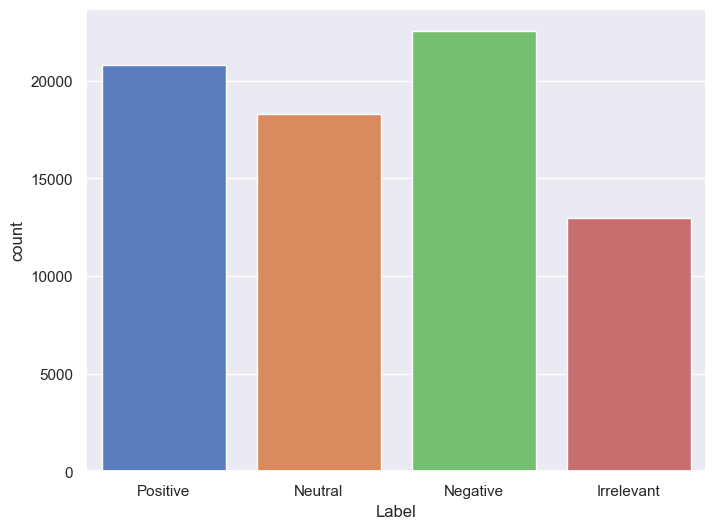

In [87]:
# Check data types and unique values
print(df['labels'].dtype)
print(df['labels'].unique())

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='labels')
plt.xlabel('Label')
plt.show()

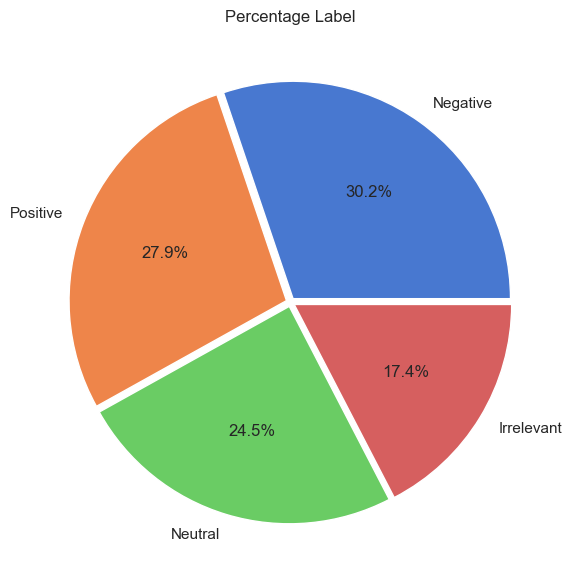

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

label_count = df['labels'].value_counts()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

sns.set_theme(style='darkgrid', palette='muted')
color = sns.color_palette(palette='muted')
explode = [0.02] * len(label_count)

axes.pie(label_count.values, labels=label_count.index, autopct='%1.1f%%', colors=color, explode=explode)
axes.set_title('Percentage Label')

plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


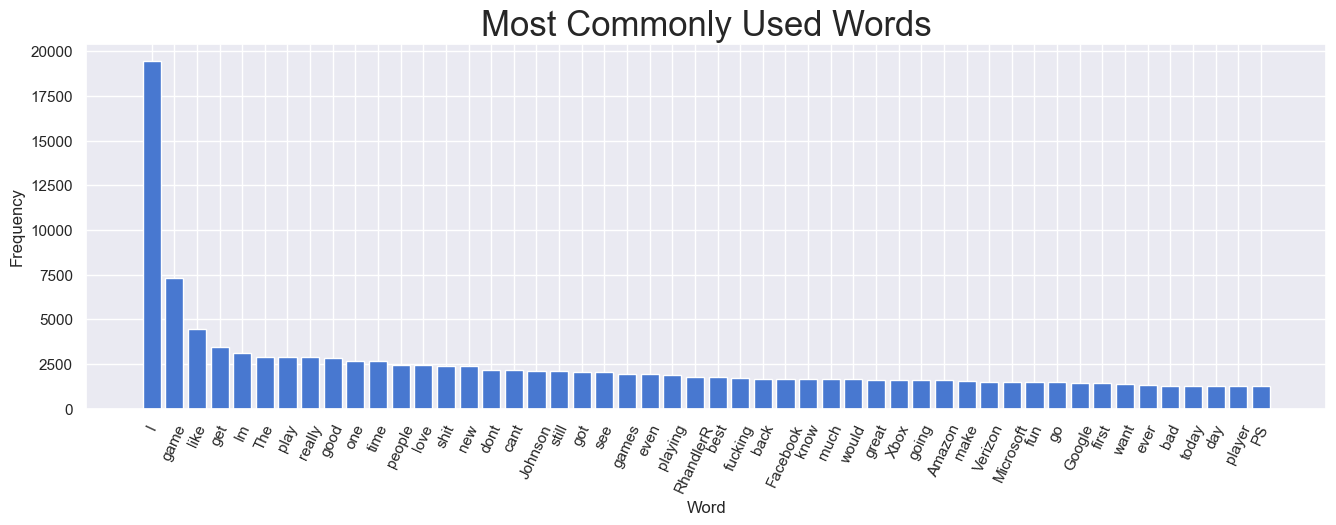

In [89]:
# Download the 'stopwords' resource
nltk.download('stopwords')

def Most_Words_used(tweets, num_of_words):
    all_text = ''.join(df[tweets].values)
    
    all_text = re.sub('<.*?>', '', all_text)  # HTML tags
    all_text = re.sub(r'\d+', '', all_text)  # numbers
    all_text = re.sub(r'[^\w\s]', '', all_text)  # special characters
    all_text = re.sub(r'http\S+', '', all_text)  # URLs or web links
    all_text = re.sub(r'@\S+', '', all_text)  # mentions
    all_text = re.sub(r'#\S+', '', all_text)  # hashtags
    
    words = all_text.split() 
    
    # remove puncs 
    punc = list(punctuation) 
    words = [word for word in words if word not in punc]
    
    # remove stopwords (now that 'stopwords' is downloaded)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]
    
    word_counts = Counter(words)
    top_words = word_counts.most_common(num_of_words)
    
    return top_words

top_words = Most_Words_used('tweets', 50)

xaxis = [word[0] for word in top_words]
yaxis = [word[1] for word in top_words]

plt.figure(figsize=(16, 5))
plt.bar(xaxis, yaxis)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words', fontsize=25)
plt.xticks(rotation=65)
plt.subplots_adjust(bottom=0.15)
plt.show()


### Data Preprocessing

In [90]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [91]:
print(nltk.data.path)

['C:\\Users\\HP/nltk_data', 'C:\\Users\\HP\\anaconda3\\nltk_data', 'C:\\Users\\HP\\anaconda3\\share\\nltk_data', 'C:\\Users\\HP\\anaconda3\\lib\\nltk_data', 'C:\\Users\\HP\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', 'C:\\Users\\Angela/nltk_data', 'C:\\Users\\Angela/nltk_data']


In [92]:
# Specify the data directory explicitly
nltk.data.path.append("C:\\Users\\Angela/nltk_data")

# Download the 'punkt' and 'wordnet' resources if not already downloaded
nltk.download('punkt')
nltk.download('wordnet')

# Define your DataPrep function
def DataPrep(text):
    # Your existing code for text preprocessing here
    
    # Tokenization
    tokens = nltk.word_tokenize(text)
    
    # Remove punctuation, stopwords, and perform lemmatization (assuming 'lemma' is defined)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    words = [lemma.lemmatize(word) for word in words]

    # Join the cleaned words back into a text
    cleaned_text = ' '.join(words)
    
    return cleaned_text

# Assuming you have a DataFrame 'df' with a 'tweets' column
df['cleaned_tweets'] = df['tweets'].apply(DataPrep)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [93]:
print(f'There are around {int(df["cleaned_tweets"].duplicated().sum())} duplicated tweets, we will remove them.')

There are around 13946 duplicated tweets, we will remove them.


In [94]:
df.drop_duplicates("cleaned_tweets", inplace=True)

In [95]:
df['tweet_len'] = [len(text.split()) for text in df.cleaned_tweets]

In [96]:
df = df[df['tweet_len'] < df['tweet_len'].quantile(0.995)]

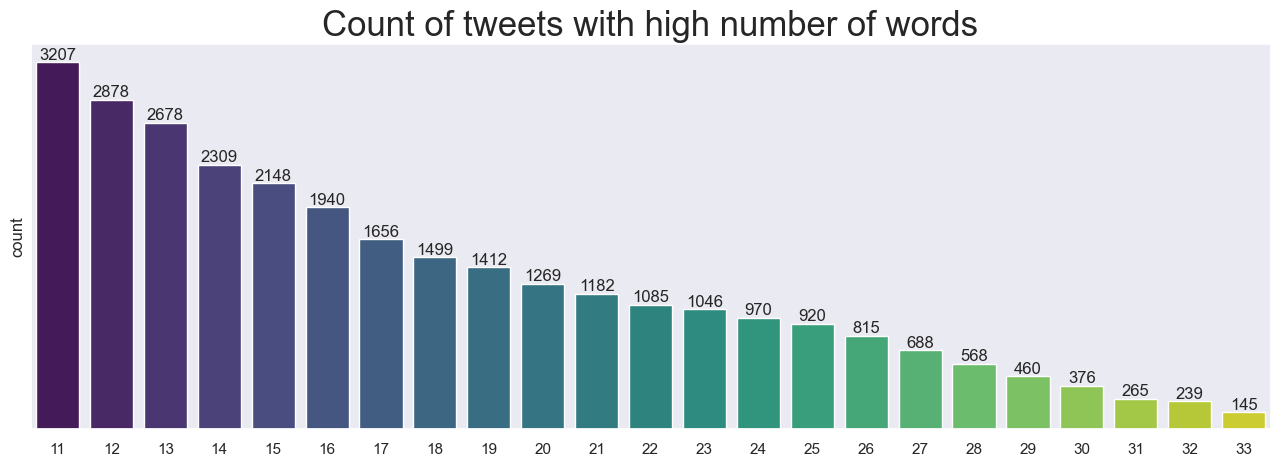

In [97]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x='tweet_len', data=df[(df['tweet_len']<=1000) & (df['tweet_len']>10)], palette='viridis')
plt.title('Count of tweets with high number of words', fontsize=25)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

### Split the data

In [98]:
# Split your data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(df['cleaned_tweets'], df['labels'], train_size=0.85, random_state=42)
len(x_train) ,len(x_val)

(51290, 9052)

### Feature Extraction

In [99]:
vec = TfidfVectorizer()
vec.fit(x_train)

# Get the feature names
feature_names = vec.get_feature_names_out()

print("No. of feature words: ", len(feature_names))

No. of feature words:  22361


In [100]:
# Convert your text data to lowercase before vectorization
x_train = [text.lower() for text in x_train]

# Create a TfidfVectorizer
vec = TfidfVectorizer()

# Transform the lowercase text data
x_train = vec.fit_transform(x_train)  # Keep it as a sparse matrix

# Transform the validation data in the same way
x_val = [text.lower() for text in x_val]
x_val = vec.transform(x_val)


### Encoding

In [101]:
y_train = lb.fit_transform(y_train)
y_val = lb.fit_transform(y_val)

### Logistic Regression

In [102]:
# Performing logistic Regression
from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression model
lr = LogisticRegression(random_state=42)

# Fit the model to your training data
lr.fit(x_train, y_train)


LogisticRegression(random_state=42)

In [103]:
train_acc1 = lr.score(x_train , y_train)
lr_pred = lr.predict(x_val)

val_acc1 = accuracy_score(y_val , lr_pred) 

val_precision1 = precision_score(y_val , lr_pred , average='weighted')
val_recall1 = recall_score(y_val , lr_pred , average='weighted')
val_f1score1 = f1_score(y_val , lr_pred , average='weighted')
print(f"The training accuracy for logistic regression : {(train_acc1*100):0.2f}%\n")
print(f"The validation accuracy for logistic regression : {(val_acc1*100):0.2f}%\n")
print(f"The precision for logistic regression : {val_precision1:0.2f}\n")
print(f"The recall for logistic regression : {val_recall1:0.2f}\n")
print(f"The f1 score for logistic regression : {val_f1score1:0.2f}\n")

The training accuracy for logistic regression : 82.57%

The validation accuracy for logistic regression : 74.93%

The precision for logistic regression : 0.75

The recall for logistic regression : 0.75

The f1 score for logistic regression : 0.75

